In [124]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Линейная регрессия

####**Построение линейной регрессионной модели**

В этом задании вы научитесь строить линейную регрессионную модель, прогнозировать значение интересующего вас признака и оценивать качество построенного прогноза. Вы сможете:

• Отбирать подходящие для модели признаки на основе анализа их распределений, а также взаимосвязей между ними.

• Подготавливать признаки для включения в линейную регрессионную модель: преобразовывать признаки, избавляться от «выбросов», и т.д.

• Строить модель линейной регрессии и интерпретировать основные коэффициенты.

• Оценивать качество построенной модели, вносить поправки, позволяющие повысить качество модели.

• Рассчитывать значение зависимого признака, исходя из значений независимых переменных (предикторов).

Используя приложенный файл данных, выполните следующее задание:

Постройте линейную регрессионную модель, которая позволяет прогнозировать количество кликов в организации той или иной рубрики (переменная ClicksCount приложенного файла данных).

Для этого выполните несколько подготовительных этапов:

1. Проанализируйте распределения признаков, которые вы хотите включить в модель. НЕ забывайте о требованиях линейной регрессионной модели к типам данных и к особенностям распределения признаков.

2. Проанализируйте взаимосвязи между признаками, которые вы хотите включить в модель. Не забывайте, что для того, чтобы модель имела смысл, необходимо включать в модель такие независимые признаки (предикторы), которые связаны с откликом (зависимой переменной) и не связаны между собой.

3. Постройте уравнение регрессии с участием тех переменных, которые Вы решили включить в модель. Составляя уравнение на основе полученных коэффициентов, помните о разнице между стандартизованными и нестандартизованными коэффициентами, а также об оценке значимости вклада признаков в модель.

4. Оцените качество модели любыми способами, которые считаете приемлемыми. Выполняя эту часть задания, помните о важности анализа не только коэффициента детерминации, но и регрессионных остатков.

5. Кратко опишите 2-3 ключевых признака, которые вносят наибольший вклад в дисперсию отклика. Как можно описать их взаимосвязь с откликом? Какие изменения приводят к увеличению количества кликов, которые получают организации той или иной рубрики? Какие рекомендации вы могли бы сформулировать на основе построенной модели?

**При формальной оценке используйте следующие критерии:**

Часть 1. Анализ исходных признаков:

2 – есть, выполнен корректно

1—есть, выполнен не полностью или с ошибками

0 – нет

Часть 2. Отбор признаков для включения в модель

2 – есть, выполнен корректно

1—есть, выполнен не полностью или с ошибками

0 – нет

Часть 3. Построение регрессионного уравнения

2 – есть, построено корректно

1—есть, построено не полностью или с ошибками

0 – нет

Часть 4. Оценка качества модели

3 – есть, присутствует анализ как коэффициента детерминации, так и регрессионных остатков, всё выполнено без ошибок

2 – есть, присутствует анализ либо коэффициента детерминации, либо регрессионных остатков, есть несущественные погрешности

1 – есть, выполнен частично или с существенными ошибками

0 – нет

Часть 5. Интерпретация результатов

3 – ключевые признаки выбраны верно, корректно и понятно описаны

2 – ключевые признаки выбраны верно, описаны неполно или с небольшими погрешностями

1 – описан только один признак, или в описании присутствуют существенные ошибки

0 – не представлена

Максимальный балл: 12 баллов


#### Загружаем необходимые библиотеки, смотрим исходные данные

In [0]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [127]:
raw = pd.read_csv("/content/gdrive/My Drive/data_analysis/data/Data_Projects.csv", sep=";", thousands=',', index_col=False) 
raw.head()

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
0,156,20,1903,176,416104363472785,535762483130904,1125,749966084023684,1
1,17,37,258,20,211678832116788,430656934306569,157,228903242434015,0
2,78,56,1956,185,349475383373688,476594027441485,1195,142337651183958,1
3,14,70,378,19,318718381112985,463743676222597,206,339656608856838,0
4,111,90,4089,90,55617545209696,490573297422085,2934,157651415402623,1


Посмотрим на матрицу диаграмм рассеяния по количественным признакам:

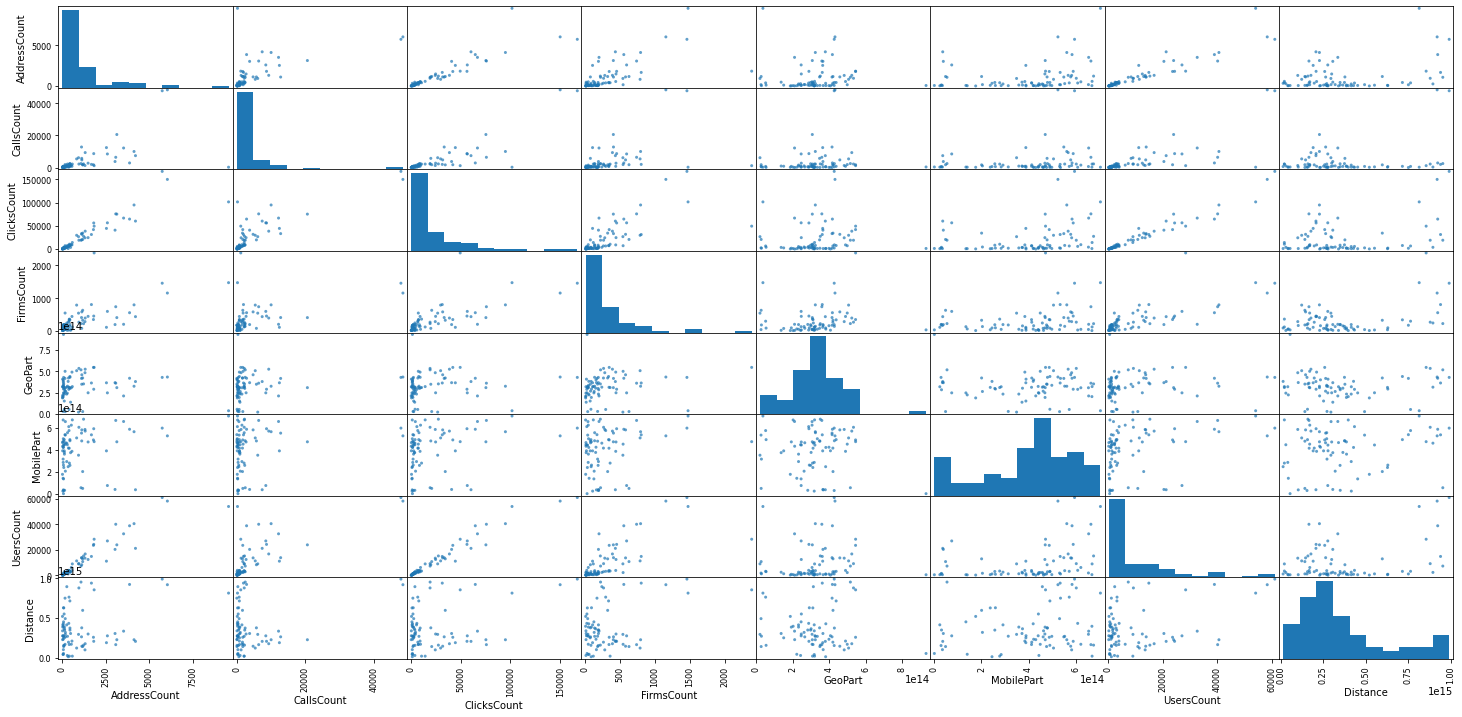

In [128]:
pd.plotting.scatter_matrix(raw[raw.columns[:-1]], alpha=0.7, 
                           figsize=(25, 12), diagonal='hist')
pylab.show()

**Видны выбросы в ClicksCount, также зависимость "Count" факторов между собой. Count факторы имеют скошенное распределение.**

## Предобработка

In [0]:
data = raw

Посмотрим на распределение целевого признака — ClicksCount: 

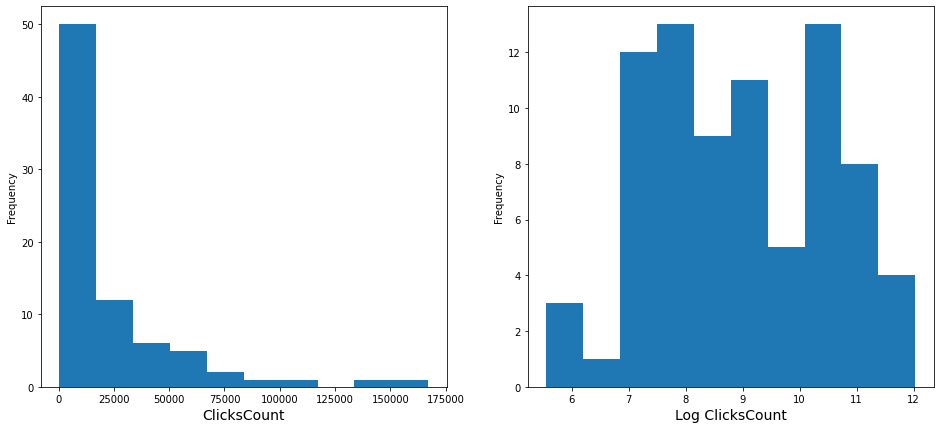

In [130]:
plt.figure(figsize(16,7))
plt.subplot(121)
data['ClicksCount'].plot.hist()
plt.xlabel('ClicksCount', fontsize=14)

plt.subplot(122)
np.log(data['ClicksCount']).plot.hist()
plt.xlabel('Log ClicksCount', fontsize=14)
pylab.show()

**У нас умеется две точки с количеством кликов выше 149000, когда в оставшейся части выборки максимальное количество кликов составляет 101558. Скорее всего это выбросы, поэтому удалим их.**

In [131]:
data[data['ClicksCount'] > 125000]

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
77,5740,47912,167155,1457,427646303638987,595409324501907,61127,989412138569643,0
78,6037,48497,149920,1157,431926384765025,524849834476639,58351,918713971923729,1


In [132]:
data[data['ClicksCount'] < 125000]['ClicksCount'].max()

101558

In [0]:
data = data[data['ClicksCount'] < 125000]

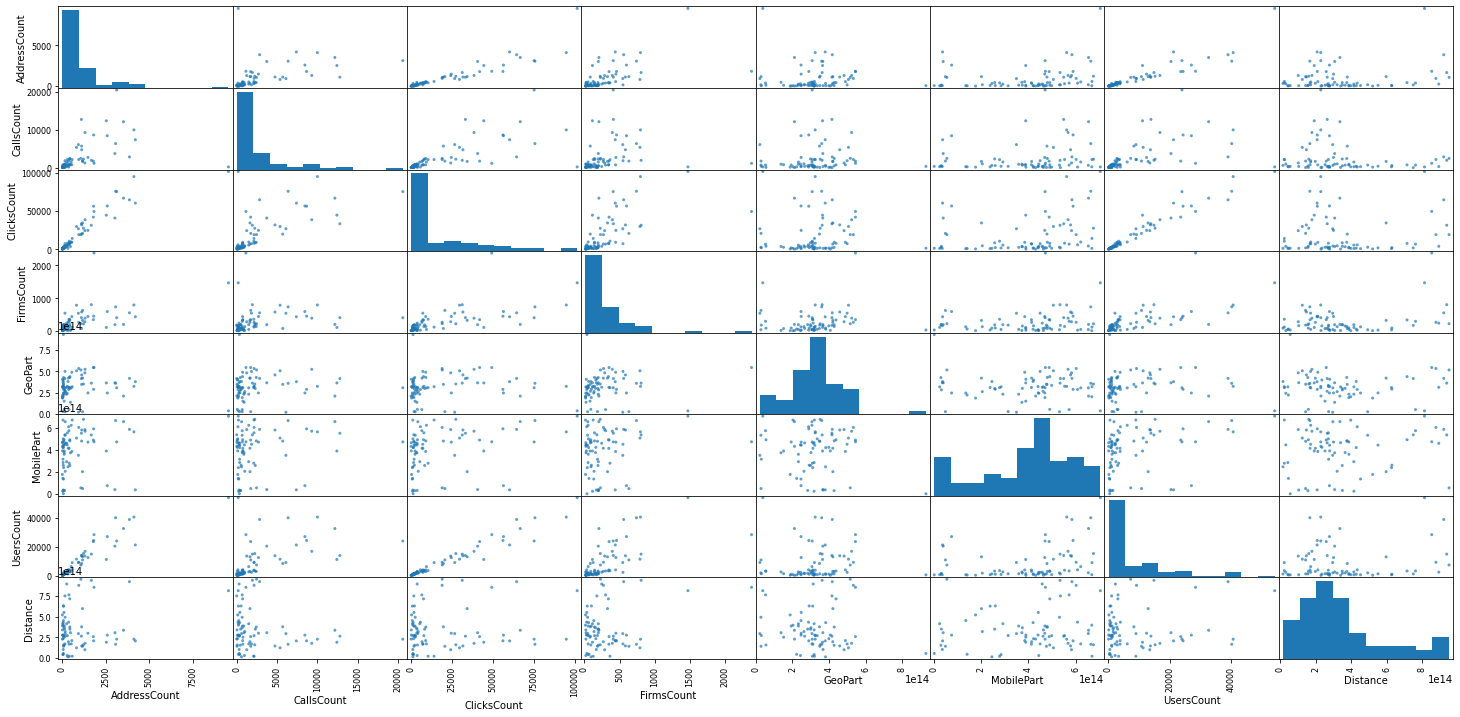

In [134]:
pd.plotting.scatter_matrix(data[data.columns[:-1]], alpha=0.7, 
                           figsize=(25, 12), diagonal='hist')
pylab.show()

**Из матрицы диаграмм рассеяния видно, что некоторые факторы имеют достаточно выраженную линейную взаимосвязь, построим корреляционную матрицу. Так как в признаках имеются выбросы/аномалии, будем рассматривать корреляцию Спирмена.**

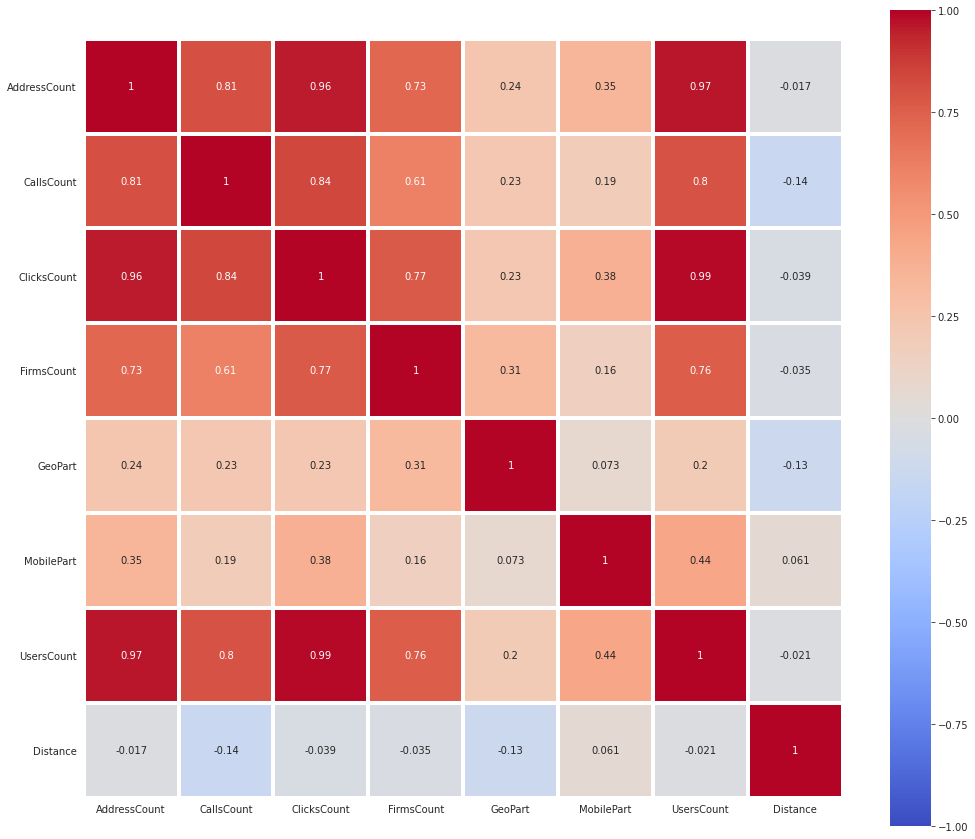

In [135]:
corr = data[data.columns[:-1]].corr(method='spearman')
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(17, 15))
    ax = sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center= 0, cmap='coolwarm', square=True, linewidths=3, linecolor='white')
    plt.yticks(rotation=0)

**Больше всех с целевой переменной ClicksCount коррелирует UsersCount, поэтому ее оставляем остальные будем удалять, наблюдая за изменениями**

## Построение модели

### Простейшая модель

**Построим линейную модель по всем признакам и посмотрим на распределение остатков.**

                            OLS Regression Results                            
Dep. Variable:            ClicksCount   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     975.8
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           2.23e-65
Time:                        22:20:48   Log-Likelihood:                -714.47
No. Observations:                  77   AIC:                             1443.
Df Residuals:                      70   BIC:                             1459.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0004   9.41e-05      4.694   

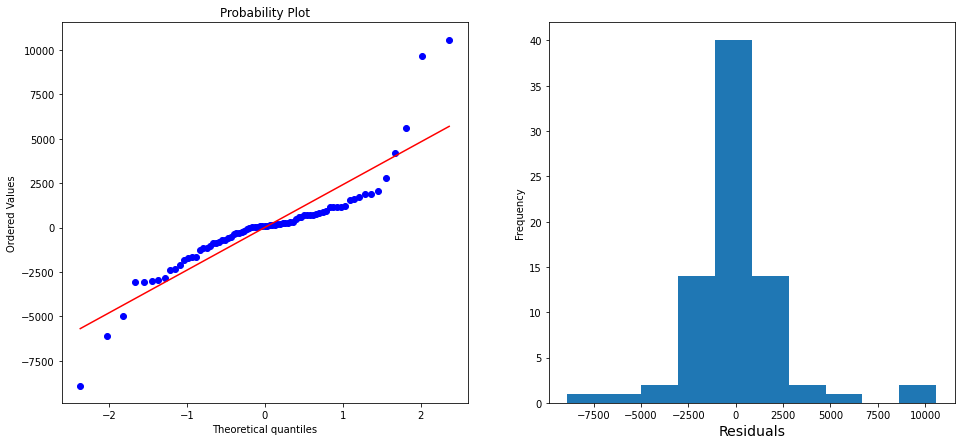

In [136]:
m1 = smf.ols('ClicksCount ~ AddressCount + CallsCount + FirmsCount + GeoPart + MobilePart + UsersCount + Distance + IsGeo', 
             data=data)
fitted = m1.fit()
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

**Не смотря на высокий коэф. детерминации 0,988, у нас остатки распределены не нормально, наблюдается их смещение, высокие показатели стандартного отклонения коэф. признаков. Это показатели проблем связанных с мультиколлинеарностью и гетероскедастичностью. Попробуем прологарифмировать и удалять постепенно Count факторы.**

                             OLS Regression Results                            
Dep. Variable:     np.log(ClicksCount)   R-squared:                       0.954
Model:                             OLS   Adj. R-squared:                  0.952
Method:                  Least Squares   F-statistic:                     505.4
Date:                 Wed, 08 Apr 2020   Prob (F-statistic):           9.89e-49
Time:                         22:20:56   Log-Likelihood:                -22.085
No. Observations:                   77   AIC:                             52.17
Df Residuals:                       73   BIC:                             61.55
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0

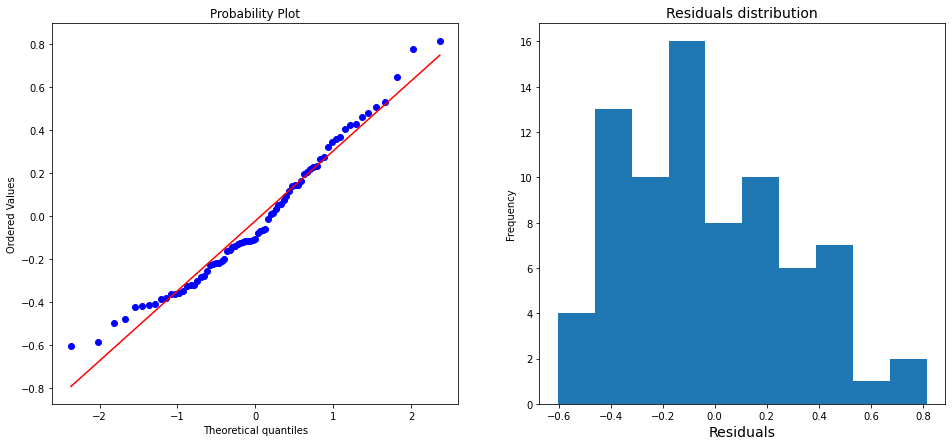

In [137]:
m2 = smf.ols('np.log(ClicksCount) ~ np.log(CallsCount) + np.log(FirmsCount) + GeoPart + MobilePart + np.log(UsersCount) + Distance + IsGeo', data=data)
fitted = m2.fit()
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.title('Residuals distribution', fontsize=14)
pylab.show()

**Коэффициент детерминации уменьшился, уменьшилось и смещение остатков, но ошибки коэффициентов все еще высокие. Пробуем удалять дальше.**

                             OLS Regression Results                            
Dep. Variable:     np.log(ClicksCount)   R-squared:                       0.927
Model:                             OLS   Adj. R-squared:                  0.924
Method:                  Least Squares   F-statistic:                     309.5
Date:                 Wed, 08 Apr 2020   Prob (F-statistic):           2.03e-41
Time:                         22:21:06   Log-Likelihood:                -39.860
No. Observations:                   77   AIC:                             87.72
Df Residuals:                       73   BIC:                             97.10
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0

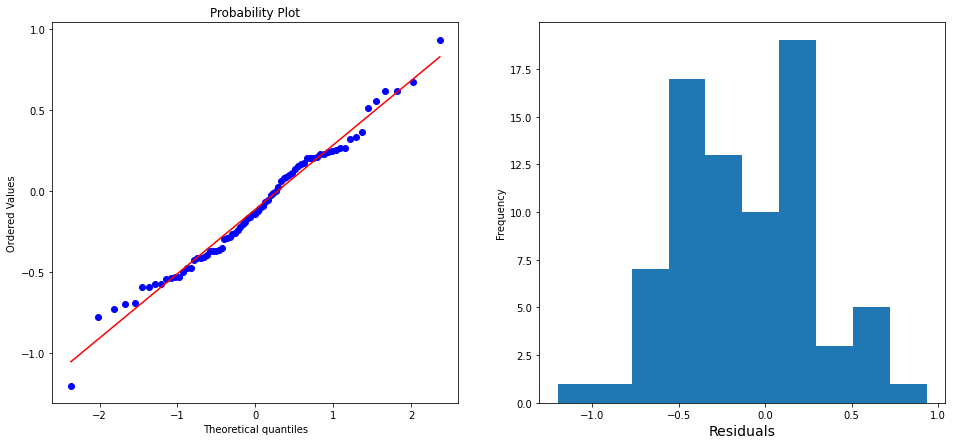

In [138]:
m3 = smf.ols('np.log(ClicksCount) ~ np.log(FirmsCount) + GeoPart + MobilePart + np.log(UsersCount) + Distance + IsGeo', data=data)
fitted = m3.fit()
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

**Уменьшается смещение остатков, критерий Дарбина-Уотсона ближе стал к 2м, что говорит об отсутствии автокорреляции остатков, распределение остатков больше похоже на нормальное. Ошибки коэффициентов уже помешьше. Пробуем удалять дальше.**

                             OLS Regression Results                            
Dep. Variable:     np.log(ClicksCount)   R-squared:                       0.979
Model:                             OLS   Adj. R-squared:                  0.978
Method:                  Least Squares   F-statistic:                     1143.
Date:                 Wed, 08 Apr 2020   Prob (F-statistic):           2.99e-61
Time:                         22:21:09   Log-Likelihood:                 8.3365
No. Observations:                   77   AIC:                            -8.673
Df Residuals:                       73   BIC:                            0.7021
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1

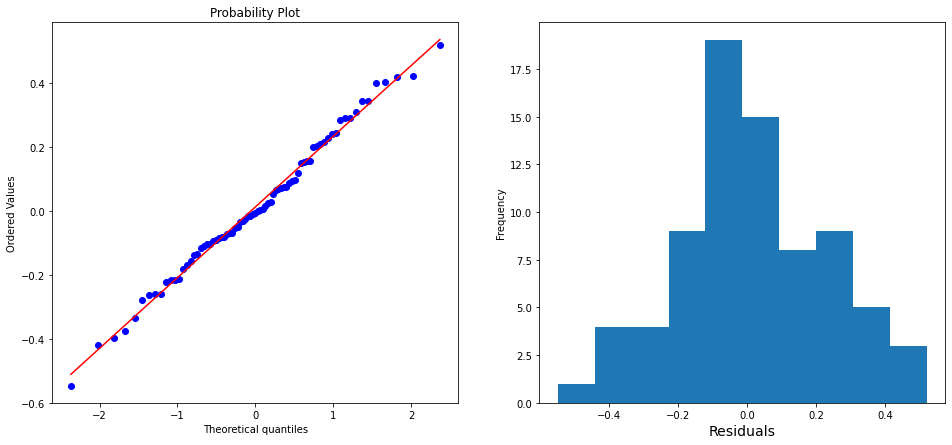

In [139]:
m4 = smf.ols('np.log(ClicksCount) ~ GeoPart + MobilePart + np.log(UsersCount) + Distance + IsGeo', data=data)
fitted = m4.fit()
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

**Используем критерий Бройша-Пагана для проверки гомоскедастичности ошибок:**

In [140]:
print('Breusch-Pagan test: p=%f' % het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.907137


**Нулевая гипотеза о гомоскедастичности остатков не опровергнута.** 

**Проверим остатки на нормальность при помощи критерия Шапиро-Уилка**

In [141]:
_, p_value = sc.stats.shapiro(fitted.resid)
print('p-value =', p_value)

p-value = 0.9181157946586609


**Критерий Шапиро-Уилка не отвергает Н0 о нормальности остатков. Коэффициент детерминации увеличился, смещения остатков практически нет, критерий Дарбина-Уотсона близок к 2, разброс коэффициентов факторов значительно снизился, что говорит о более высокой устойчивости модели. Так как остатки нормальны и гомоскедастичны, мы можем доверять t-критерию стюдента о значимости коэффициента фактора, значимость критерия Distance в модели не подтверждена. Попробуем его удалить.**

                             OLS Regression Results                            
Dep. Variable:     np.log(ClicksCount)   R-squared:                       0.979
Model:                             OLS   Adj. R-squared:                  0.978
Method:                  Least Squares   F-statistic:                     1725.
Date:                 Wed, 08 Apr 2020   Prob (F-statistic):           8.29e-63
Time:                         22:21:46   Log-Likelihood:                 8.0548
No. Observations:                   77   AIC:                            -10.11
Df Residuals:                       74   BIC:                            -3.078
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1

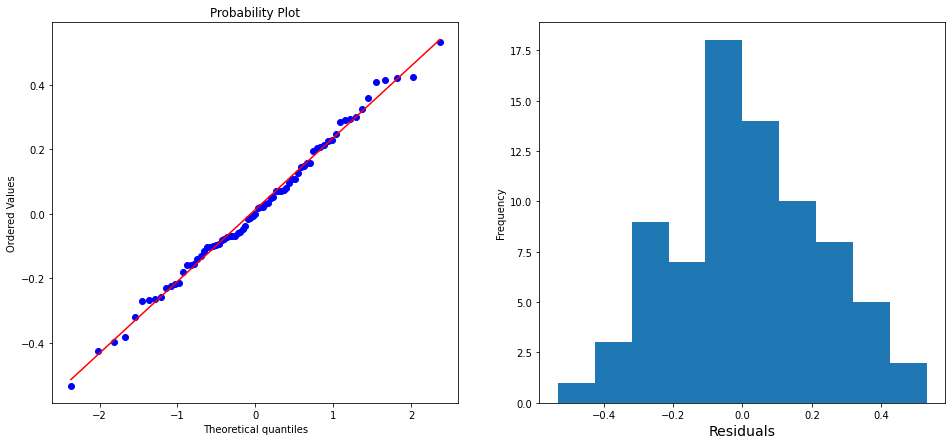

In [142]:
m5 = smf.ols('np.log(ClicksCount) ~ GeoPart + MobilePart + np.log(UsersCount) + IsGeo', data=data)
fitted = m5.fit()
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

**Критерий Шапиро-Уилка**

In [143]:
_, p_value = sc.stats.shapiro(fitted.resid)
print('p-value =', p_value)

p-value = 0.9625660181045532


**Остатки распределены нормально**

**Применим критерий Фишера, чтобы понять, не стала ли модель от удаления признаков значимо хуже.**

In [144]:
print("F=%f, p=%f, k1=%f" % m1.fit().compare_f_test(m5.fit()))

F=-17.500000, p=1.000000, k1=4.000000


**Не стала.**

**Посмотрим как распределены остатки по имеющимся количественным факторам, нет ли какой-нибудь зависимости.**

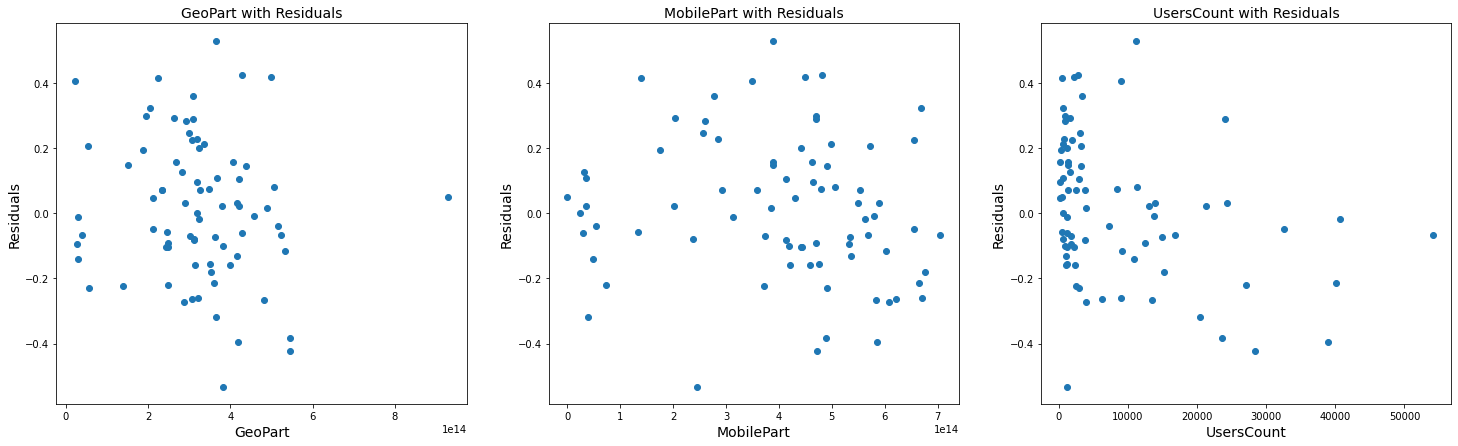

In [146]:
plt.figure(figsize=(25, 7))

plt.subplot(131)
plt.scatter(data['GeoPart'], fitted.resid)
plt.xlabel('GeoPart', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('GeoPart with Residuals', fontsize=14)

plt.subplot(132)
plt.scatter(data['MobilePart'], fitted.resid)
plt.xlabel('MobilePart', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('MobilePart with Residuals', fontsize=14)

plt.subplot(133)
plt.scatter(data['UsersCount'], fitted.resid)
plt.xlabel('UsersCount', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('UsersCount with Residuals', fontsize=14)

plt.show()

**Остатки распределены достаточно случайно, зависимости не видны.**

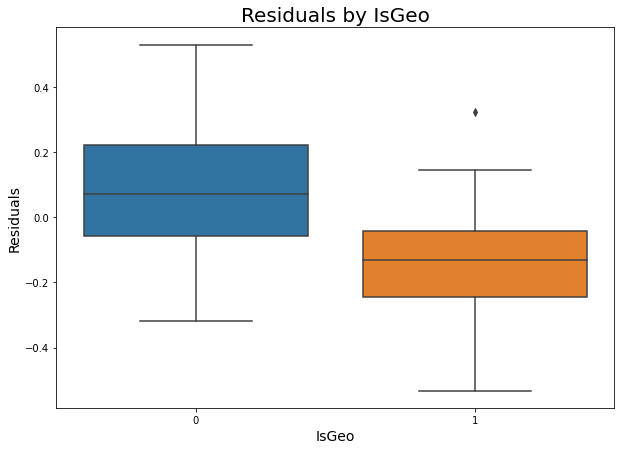

In [149]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=data['IsGeo'], y=fitted.resid)
plt.xlabel('IsGeo', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals by IsGeo', fontsize=20)
plt.show()

**А в данном случае видно, что для геозависимых сфер остатки чаще отрицательны и наоборот. Скорее всего модель построенная по отдельным выборкам будет давать лучший результат**

**Проверим, нет ли наблюдений, которые слишком сильно влияют на регрессионное уравнение:**

<Figure size 576x504 with 0 Axes>

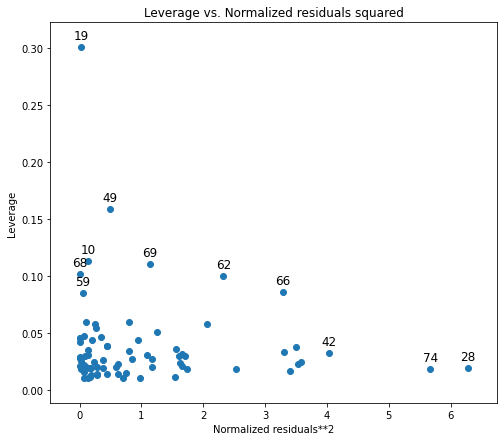

In [151]:
plt.figure(figsize(8,7))
plot_leverage_resid2(fitted)
pylab.show()

**По оси ОХ у нас квадрат ошибки, по ОУ уровень влияния. Очень сильное влияние на модель оказывает 19 наблюдение, а больше всего мы ошибаемся на 74 и 28 наблюдении. Рассмотрим их.**

In [152]:
data.loc[[19, 74, 28]]

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
19,66,344,1478,35,929166666666667,9,500,55280655460862,0
74,2535,12436,44597,113,364709871447105,388518693242128,11172,190810811023819,0
28,336,611,1383,93,380847953216374,244883040935673,1130,14373055534143,1


In [153]:
data.drop([19, 74, 28]).describe()

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
count,74.000000,74.000000,74.000000,74.000000,7.400000e+01,7.400000e+01,74.000000,7.400000e+01,74.000000
mean,920.013514,2411.432432,18374.621622,287.121622,3.116769e+14,4.065348e+14,8624.554054,3.539678e+14,0.351351
std,1473.594743,3639.261494,24128.661360,354.111040,1.301915e+14,1.895735e+14,11629.175696,2.395261e+14,0.480651
min,9.000000,20.000000,258.000000,14.000000,2.226956e+13,2.316258e+13,157.000000,2.173762e+13,0.000000
25%,79.500000,326.250000,2150.500000,67.750000,2.468759e+14,2.856948e+14,1195.250000,1.826259e+14,0.000000
50%,362.500000,913.500000,6867.500000,188.500000,3.161403e+14,4.541918e+14,2903.000000,2.865410e+14,0.000000
75%,1157.000000,2302.500000,27366.500000,387.750000,4.050757e+14,5.462707e+14,12870.500000,4.246657e+14,1.000000
max,9552.000000,20609.000000,101558.000000,2379.000000,5.445019e+14,7.053151e+14,54098.000000,9.520123e+14,1.000000


**Как видно в 19 наблюдении имеется ошибка в данных MobilePart. Два других наблюдения имеют не совсем согласующиеся показатели соотношения ClicksCount с остальными факторами. А модель регрессии имеет свойство переобучаться на выбросы. Поэтому удалим эти наблюдения из нашей выборки.**

                             OLS Regression Results                            
Dep. Variable:     np.log(ClicksCount)   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.981
Method:                  Least Squares   F-statistic:                     1885.
Date:                 Wed, 08 Apr 2020   Prob (F-statistic):           2.98e-62
Time:                         22:31:20   Log-Likelihood:                 12.827
No. Observations:                   74   AIC:                            -19.65
Df Residuals:                       71   BIC:                            -12.74
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1

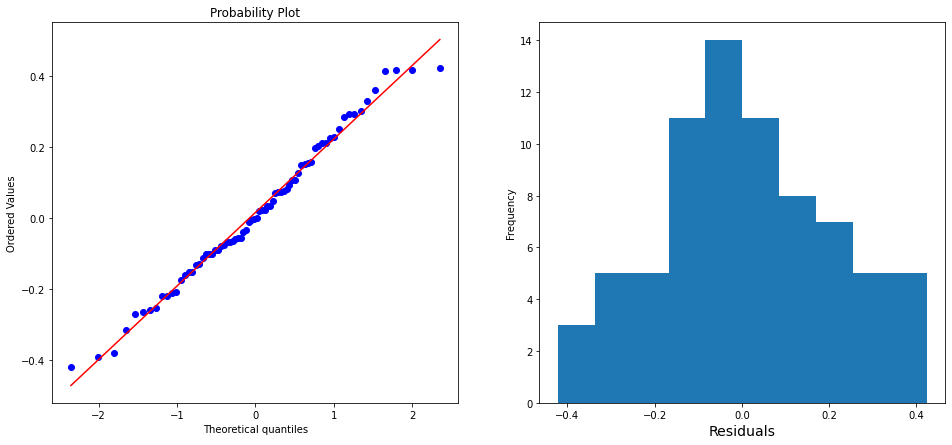

In [154]:
m7 = smf.ols('np.log(ClicksCount) ~ GeoPart + MobilePart + np.log(UsersCount) + IsGeo', data=data.drop([19, 74, 28]))
fitted = m7.fit()
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

In [155]:
_, p_value = sc.stats.shapiro(fitted.resid)
print('p-value =', p_value)

p-value = 0.5115967988967896


**Коэффициент Дарбина-Уотсона совсем приблизился к 2м, чуть увеличилось смещение остатков, но они по прежнему распределены нормально, а также вырос коэффициент детерминации.**

## Выводы

**Итоговая модель объясняет 98% вариации логарифма отклика.** 

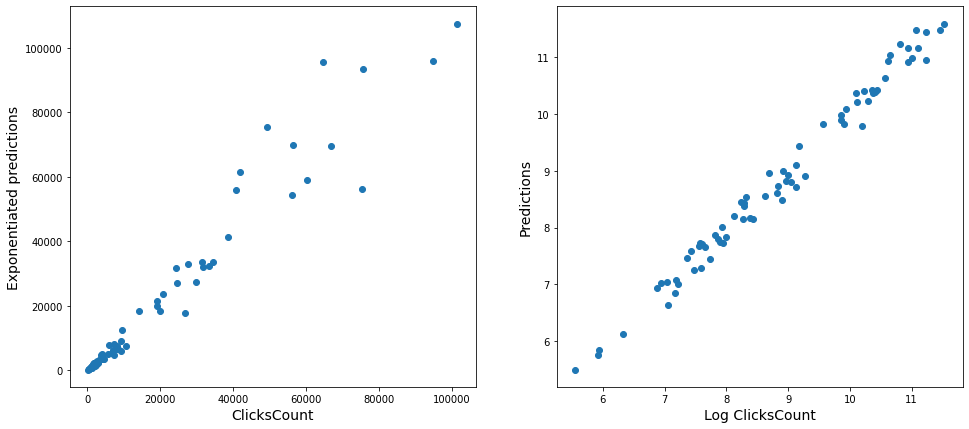

In [156]:
plt.figure(figsize(16,7))
plt.subplot(121)
scatter(data.drop([19, 74, 28])['ClicksCount'],np.exp(fitted.fittedvalues))
plt.xlabel('ClicksCount', fontsize=14)
plt.ylabel('Exponentiated predictions', fontsize=14)

plt.subplot(122)
scatter(np.log(data.drop([19, 74, 28])['ClicksCount']),fitted.fittedvalues)
plt.xlabel('Log ClicksCount', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
pylab.show()

**Итоговое уравнение регрессии можно записать следующим образом:**

**log(ClicksCount) = 0.1115 + 5.164e-16*GeoPart - 3.242e-16*MobilePart  + 1.0727*log(UsersCount) - 0.0087IsGeo**

**Так как мы считали логарифм количества кликов, то можно сказать, что наша модель предсказывает увеличение ClicksCount в %. Таким образом, при увеличении количества пользователей (UsersCount) на 1%, количество кликов (ClicksCount) увеличится на 1,0727%. Если сфера является геозависимой, то количество кликов уменьшается на 0,0087%. И количество кликов прямо пропорционально доли трафика с карты (GeoPart) и обратно пропорционально доли трафика с мобильных продуктов (MobilePart). Возможно это связано с тем, что считается кликом.**

**Также ниже представлены модели построенные по отдельным выборкам для геозависимых и геонезависимых сфер**

#### **Геозависимые сферы**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


                             OLS Regression Results                            
Dep. Variable:     np.log(ClicksCount)   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.983
Method:                  Least Squares   F-statistic:                     1436.
Date:                 Wed, 08 Apr 2020   Prob (F-statistic):           6.35e-23
Time:                         22:36:21   Log-Likelihood:                 11.005
No. Observations:                   26   AIC:                            -18.01
Df Residuals:                       24   BIC:                            -15.49
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1

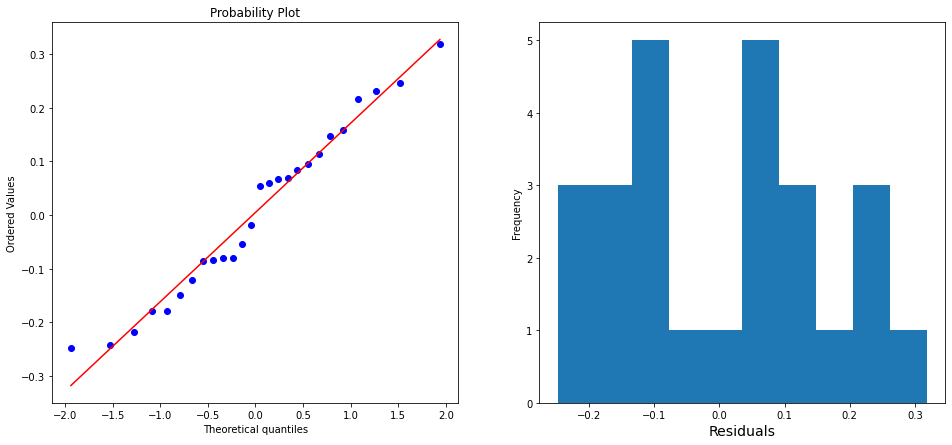

In [160]:
m7 = smf.ols('np.log(ClicksCount) ~ GeoPart + np.log(UsersCount)', data=data.drop([19, 74, 28])[data['IsGeo'] == 1])
fitted = m7.fit()
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

#### **Геонезависимые сферы**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


                             OLS Regression Results                            
Dep. Variable:     np.log(ClicksCount)   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.981
Method:                  Least Squares   F-statistic:                     2489.
Date:                 Wed, 08 Apr 2020   Prob (F-statistic):           1.05e-41
Time:                         22:36:36   Log-Likelihood:                 12.925
No. Observations:                   48   AIC:                            -21.85
Df Residuals:                       46   BIC:                            -18.11
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1

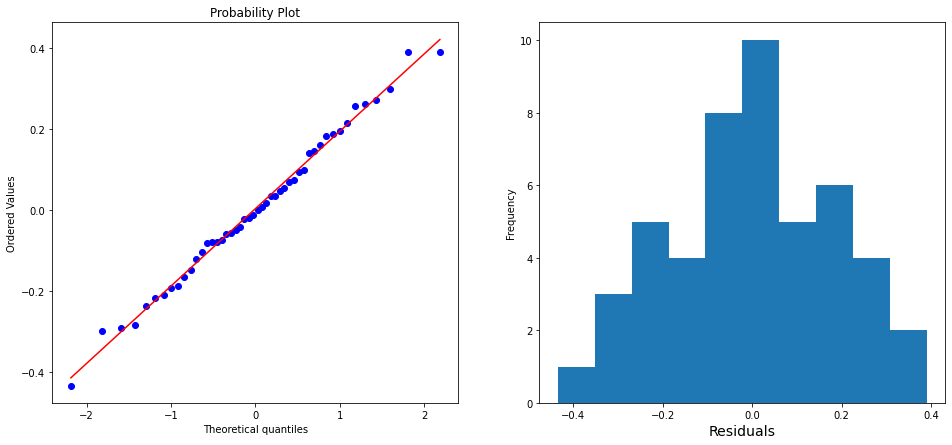

In [161]:
m7 = smf.ols('np.log(ClicksCount) ~ GeoPart + np.log(UsersCount)', data=data.drop([19, 74, 28])[data['IsGeo'] == 0])
fitted = m7.fit()
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()